#**Decision Tree Classifier: Wine Quality**





####The objective of the analysis is to use a decision tree algorithm to predict the quality of red and white variants of the Portuguese Vinho Verde wine based on objective metrics from the dataset, such as acidity levels, pH values, ABV, etc. The analysis aims to answer the question of whether wine quality can be accurately predicted using the provided features. The decision tree algorithm will be used to develop a predictive model that can classify wine samples into quality categories, capturing any non-linear relationships between features and wine quality. The goal is to create an interpretable and accurate model for wine quality prediction in the problem domain.

####For this analysis we will be using the following libraries: *pandas, scikit-learn, numPy, pydotplus, graphviz and matplotlib*

In [263]:
#Importing libraries for the Decision Tree Classifier model 
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#**Data Set**:
####The dataset used is from Kaggle, and it is a combined version of two separate files: one for red wine samples and one for white wine samples, originally shared in the UCI Machine Learning Repository.
 
####The data was collected by P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis for their research on modeling wine preferences by data mining from physicochemical properties.


####**Variables**: image.png



#**Exploratory Analysis:**

In [264]:
#Load the data from a CSV file and display the first 5 rows of the dataset

wq_df = pd.read_csv("wine_quality.csv")
wq_df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [265]:
# Display last five rows of the dataset

wq_df.tail()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [266]:
# Row and columns

wq_df.shape

(6497, 13)

In [267]:
# Getting basic stats on the dataset

wq_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [268]:
# Number of instances for each rating (0-10)

wq_df.groupby("quality").size()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

In [269]:
# Checking  if there are missing values 

wq_df.isnull().any().any()

False

#**Pre-processing:**

## Defining X (independent/features) and Y (dependent/target vector) varibles:

In [270]:
# Defining X (features)
X = wq_df[['type', 'fixed_acidity',	'volatile_acidity',	'citric_acid',	'residual_sugar',	'chlorides',	'free_sulfur_dioxide',	'total_sulfur_dioxide', 'density',	'pH',	'sulphates',	'alcohol']].values
X[0:5]


array([['white', 7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0,
        0.45, 8.8],
       ['white', 6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3,
        0.49, 9.5],
       ['white', 8.1, 0.28, 0.4, 6.9, 0.05, 30.0, 97.0, 0.9951, 3.26,
        0.44, 10.1],
       ['white', 7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19,
        0.4, 9.9],
       ['white', 7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19,
        0.4, 9.9]], dtype=object)

In [271]:
# Transforming categorical variable "type" to a continuous variable
from sklearn import preprocessing
le_type = preprocessing.LabelEncoder()
le_type.fit(['white','red'])
X[:,0] = le_type.transform(X[:,0]) 

X[0:5]

array([[1, 7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45,
        8.8],
       [1, 6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49,
        9.5],
       [1, 8.1, 0.28, 0.4, 6.9, 0.05, 30.0, 97.0, 0.9951, 3.26, 0.44,
        10.1],
       [1, 7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19, 0.4,
        9.9],
       [1, 7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19, 0.4,
        9.9]], dtype=object)

In [272]:
# Defining target variable 
y = wq_df["quality"]
y[0:5]

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

##Splitting dataset into Test/Train sets:

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

##Creating the Machine Learning Model:

In [275]:
wineTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
wineTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [276]:
wineTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [277]:
predTree = wineTree.predict(X_testset)


In [278]:
predTree

array([5, 6, 5, ..., 6, 5, 6])

# Evaluating the ML model: 



In [279]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.5158974358974359


**The decision tree plot** is a visual representation of the tree structure created by a decision tree algorithm. It shows the decision points (nodes) and predicted class labels (leaf nodes) based on feature values. The plot provides a clear and intuitive understanding of how the model makes decisions and classifies data points.

In [280]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

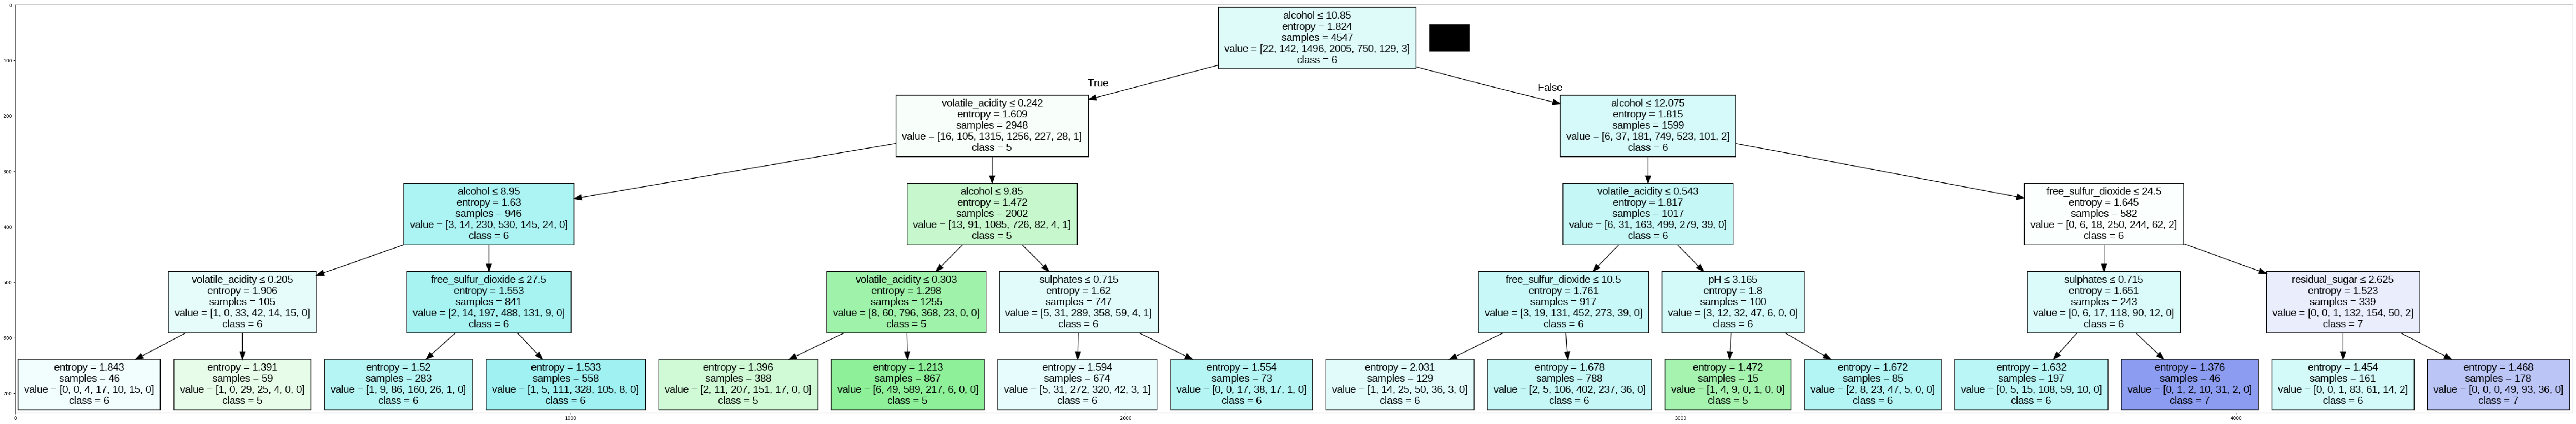

In [281]:
dot_data = StringIO()
filename = "winetree.png"
featureNames = wq_df.columns[0:12].tolist()  # Convert to list of string values
class_names = np.unique(y_trainset).astype(str).tolist()  # Convert to list of string values
out = tree.export_graphviz(wineTree, feature_names=featureNames, out_file=dot_data, class_names=class_names, filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')



**The decision tree validation plot** is a graphical representation of how a model performs on the training and validation sets with different hyperparameter values, usually the maximum depth of the tree. It helps in selecting the best hyperparameter value that results in optimal model performance. The plot shows the training and validation scores, and can provide insights into the model's complexity and generalization performance. By analyzing the validation plot, we can make informed decisions about the appropriate hyperparameter values to use in the model, and optimize its performance.

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


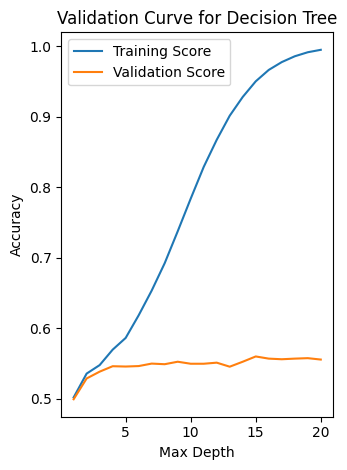

In [282]:
from sklearn.model_selection import learning_curve, validation_curve

# Define the decision tree classifier
clf = DecisionTreeClassifier()

# Create a validation curve
param_range = np.arange(1, 21)
train_scores, test_scores = validation_curve(clf, X_trainset, y_trainset, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy')


# Plot the validation curve
plt.subplot(1, 2, 2)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Decision Tree')
plt.legend()

plt.tight_layout()
plt.show()


Source: scikit-learn. (2023). validation_curve - scikit-learn. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html [link text](https://)